In [1]:
import pandas as pd
import numpy as np

In [57]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")

In [120]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [121]:
df_col = df[['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']]

In [122]:
df_col

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


<Axes: >

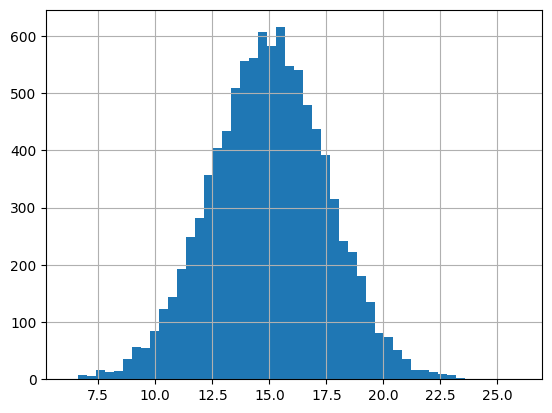

In [123]:
df_col['fuel_efficiency_mpg'].hist(bins = 50)

In [124]:
df_col.isnull().sum() > 0

engine_displacement    False
horsepower              True
vehicle_weight         False
model_year             False
fuel_efficiency_mpg    False
dtype: bool

In [125]:
df_col['horsepower'].median()

np.float64(149.0)

## Train_test_split

In [126]:
np.random.seed(42)

In [127]:
n = int(len(df_col) * .2)
n_train = len(df_col) - 2 * n

In [128]:
len(df_col)

9704

In [129]:
n_train+ n+ n

9704

In [130]:
idx = np.arange(len(df_col))
idx

array([   0,    1,    2, ..., 9701, 9702, 9703], shape=(9704,))

In [131]:
np.random.shuffle(idx)

In [132]:
df_train = df_col.iloc[idx[:n_train]]
df_val = df_col.iloc[idx[n_train: n_train+ n]]
df_test = df_col.iloc[idx[n_train+ n:]]

In [133]:
df_train.shape[0] , df_val.shape[0], df_test.shape[0]

(5824, 1940, 1940)

In [134]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [135]:
y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']
y_test = df_test['fuel_efficiency_mpg']

In [136]:
df_train = df_train.drop('fuel_efficiency_mpg', axis=1)

df_val = df_val.drop('fuel_efficiency_mpg', axis=1)

df_test = df_test.drop('fuel_efficiency_mpg', axis=1)


## Linear Regression

In [137]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [138]:
def fill_missing (df_train,df, x):
    if x == 1:
        df = df.fillna(0)
    else:
        df = df.fillna(df_train.mean())
    return df

In [139]:
def fill_zero(df):
    return df.fillna(0)

In [140]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [141]:
x_train_0 = fill_missing(df_train,df_train, 1)

In [142]:
x_train_mean = fill_missing(df_train,df_val, 2)

In [147]:
x_train_mean

,engine_displacement,horsepower,vehicle_weight,model_year
0,180,112.0,2772.134410,2020
1,260,138.0,3014.061530,2022
2,140,181.0,3652.186151,2016
3,270,105.0,2753.040847,2023
4,170,224.0,4163.375137,2003
...,...,...,...,...
1935,290,205.0,3403.401496,2019
1936,200,159.0,2752.516039,2009
1937,230,202.0,3303.000688,2008
1938,220,169.0,3293.420251,2008


In [143]:
w0, w = train_linear_regression(x_train_0, y_train)
x_val_0 = fill_missing(df_train,df_val, 1)
y_pred = w0 + x_val_0.dot(w)

rmse(y_val, y_pred).round(2)

np.float64(0.52)

In [148]:
w0, w = train_linear_regression(x_train_mean, y_train)
x_val_mean = fill_missing(df_train,df_val, 2)
y_pred = w0 + x_val_mean.dot(w)

rmse(y_val, y_pred).round(2)

ValueError: shapes (5,1940) and (5824,) not aligned: 1940 (dim 1) != 5824 (dim 0)

## Regularized Linear Regression

In [96]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [98]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = fill_zero(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    X_val = fill_zero(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r, w0, score)

0 28.827365475106156 0.5173782638857467
0.01 24.92683842008767 0.5171115525767522
0.1 11.239661084961272 0.5187525130701821
1 1.7315979411936366 0.5222348802092772
5 0.3638075020692219 0.5228916092823478
10 0.18306246622306527 0.5229812979636581
100 0.018418017306977234 0.5230636233819926


## Q5

In [99]:
rmse_scores = []

for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(i)
    idx = np.arange(len(df_col))
    np.random.shuffle(idx)
    
    df_train = df_col.iloc[idx[:n_train]]
    df_val = df_col.iloc[idx[n_train: n_train+ n]]
    df_test = df_col.iloc[idx[n_train+ n:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train['fuel_efficiency_mpg']
    y_val = df_val['fuel_efficiency_mpg']
    y_test = df_test['fuel_efficiency_mpg']
    
    df_train = df_train.drop('fuel_efficiency_mpg', axis=1)
    df_val = df_val.drop('fuel_efficiency_mpg', axis=1)
    df_test = df_test.drop('fuel_efficiency_mpg', axis=1)
    
    X_train = fill_zero(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    X_val = fill_zero(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)

In [105]:
rmse_scores_arr = np.array(rmse_scores)

In [110]:
np.std(rmse_scores_arr).round(3)

np.float64(0.007)

## Q6

In [114]:
np.random.seed(9)
idx = np.arange(len(df_col))
np.random.shuffle(idx)

df_train = df_col.iloc[idx[:n_train]]
df_val = df_col.iloc[idx[n_train: n_train+ n]]
df_test = df_col.iloc[idx[n_train+ n:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']
y_test = df_test['fuel_efficiency_mpg']

df_train = df_train.drop('fuel_efficiency_mpg', axis=1)
df_val = df_val.drop('fuel_efficiency_mpg', axis=1)
df_test = df_test.drop('fuel_efficiency_mpg', axis=1)

In [115]:
df_full = pd.concat([df_train,df_val])

In [116]:
y_full = pd.concat([y_train,y_val])

In [119]:
X_train = fill_zero(df_full)
w0, w = train_linear_regression_reg(X_train, y_full, r=0.001)
X_test = fill_zero(df_test)
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred)

np.float64(0.5156261299167999)